In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации

import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрикиы
from sklearn import preprocessing #метод стандартизации
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [42]:
df = pd.read_csv('data/insurance.csv')

In [43]:
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
# смотрим на пропуски
display(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [48]:
temp_df = df.copy()

In [49]:
types = temp_df.dtypes
types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [50]:
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

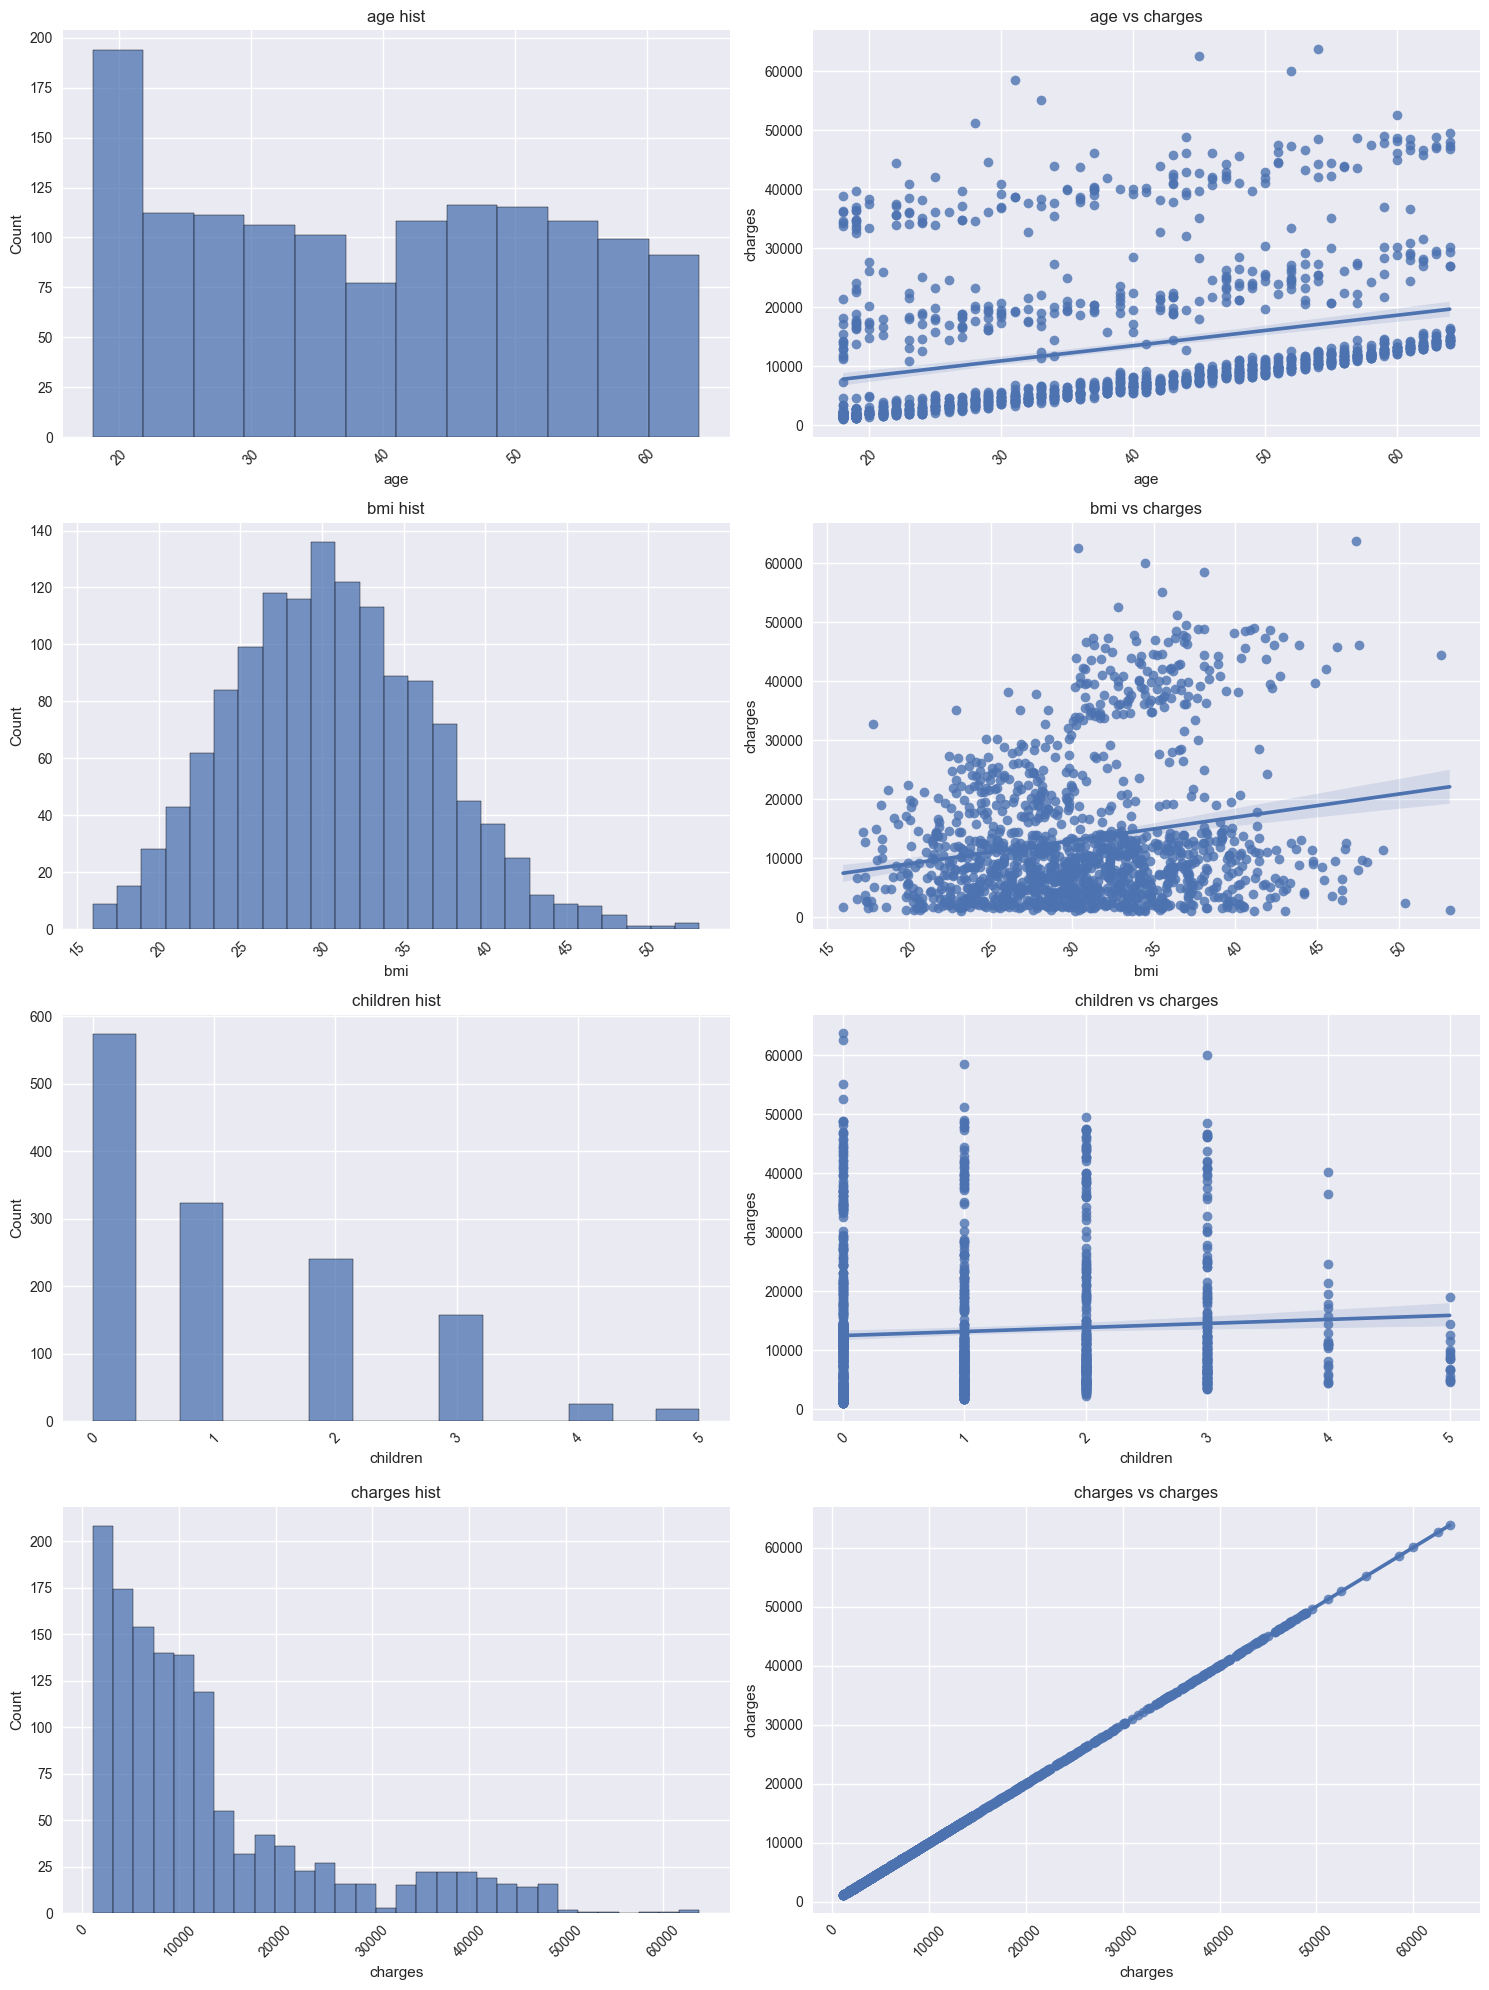

In [51]:
n = len(num_features)

fig, axes = plt.subplots(n, 2, figsize=(15, 20))

for i, feature in enumerate(num_features):
    hist = sns.histplot(data=temp_df, x = feature, ax=axes[i][0])
    hist.set_title('{} hist'.format(feature))
    hist.xaxis.set_tick_params(rotation=45)
    
    regplot = sns.regplot(data=temp_df, x = feature, y='charges', ax=axes[i][1])
    regplot.set_title('{} vs charges'.format(feature))
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout()

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_22832\234275740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


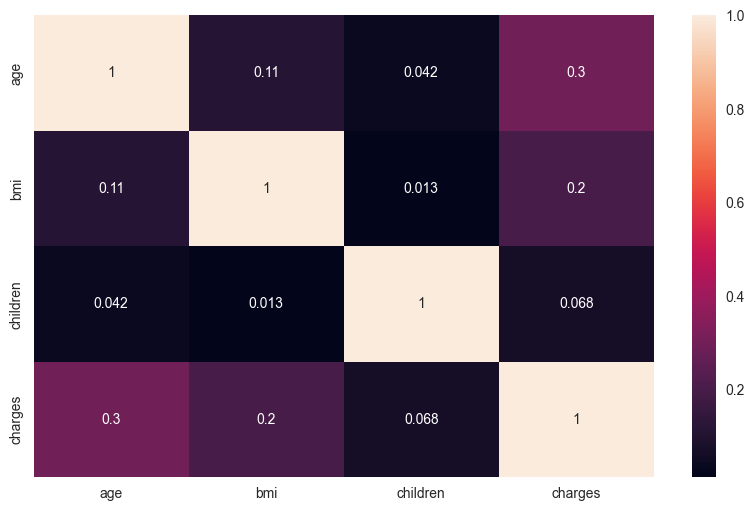

In [52]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True);

In [53]:
# столбцы sex и smoker бинарные категориальные признаки, переводим в 0 и 1
temp_df['sex'] = temp_df['sex'].apply(lambda x: 0 if x == 'famale' else 1)
temp_df['smoker'] = temp_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [54]:
temp_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [55]:
#оставшиеся категориальные признаки кодируем с помощью OneHot\
temp_df = pd.get_dummies(temp_df)

In [56]:
temp_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [57]:
X = temp_df.drop('charges', axis=1)
y = temp_df['charges']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_test.shape

(268, 9)

In [60]:
lean_reg = linear_model.LinearRegression()
lean_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
sp = list(temp_df.drop('charges', axis=1).columns)

In [62]:
w_df = pd.DataFrame({'Features': sp, 'Coefficients': lean_reg.coef_})
w_df

,Features,Coefficients
0,age,2.569813e+02
1,sex,-2.444267e-12
2,bmi,3.370578e+02
3,children,4.251575e+02
4,smoker,2.364949e+04
5,region_northeast,4.594642e+02
6,region_northwest,8.856134e+01
7,region_southeast,-1.980056e+02
8,region_southwest,-3.500200e+02


In [63]:
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lean_reg.intercept_})
intercept_df.round(2)

,Features,Coefficients
0,INTERCEPT,-12399.02


In [68]:
# делаем предсказания на тренировочной и тестовой выборках
y_train_predict = lean_reg.predict(X_train)
y_test_predict = lean_reg.predict(X_test)

In [71]:
def get_matrics(y_train, y_train_pr, y_test, y_test_pr):
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_pr)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pr)*100))
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pr)))
    print('\n')
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_pr)))
    print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pr)*100))
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pr)))
    

In [72]:
get_matrics(y_train, y_train_predict, y_test, y_test_predict)

Train MAE: 4208
Train MAPE: 42
Train R^2: 0.742


Test MAE: 4182
Test MAPE: 47
Test R^2: 0.784


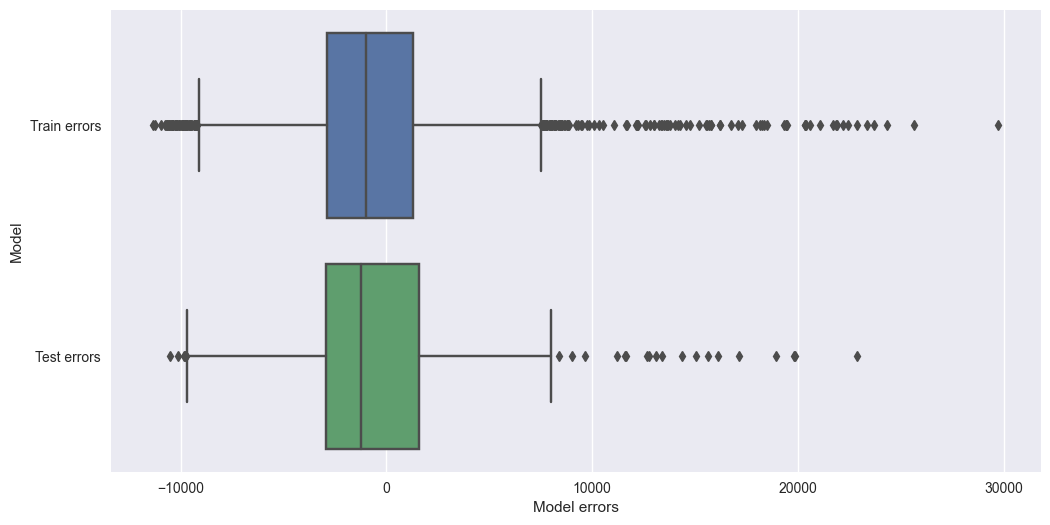

In [73]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_predict
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_predict
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [77]:
# нормализуем признаки с помощью min-max-нормализации
mns = preprocessing.MinMaxScaler()
mns.fit(X_train)

# нормализуем наши признаки
X_train_mns = mns.transform(X_train)
X_test_mns = mns.transform(X_test)

In [78]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_mns)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train_mns)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test_mns)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(1070, 54)
(268, 54)


In [84]:
lean_reg_mns = linear_model.LinearRegression()
lean_reg_mns.fit(X_train_poly, y_train)

LinearRegression()

In [85]:
y_train_predict_mns = lean_reg_mns.predict(X_train_poly)
y_test_predict_mns = lean_reg_mns.predict(X_test_poly)

In [86]:
get_matrics(y_train, y_train_predict_mns, y_test, y_test_predict_mns)

Train MAE: 2901
Train MAPE: 30
Train R^2: 0.840


Test MAE: 2684
Test MAPE: 30
Test R^2: 0.869


In [88]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_poly)
#Рассчитываем коэффициент детерминации для двух выборок
get_matrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train MAE: 2901
Train MAPE: 30
Train R^2: 0.840


Test MAE: 2682
Test MAPE: 30
Test R^2: 0.869


In [89]:
print(np.round(lasso_lr_poly.coef_, 3))

[ 3.7064410e+03  0.0000000e+00  4.8471220e+03  4.0095660e+03
  2.2373130e+03  1.0300600e+02 -4.5889300e+02  7.6629000e+02
 -4.2894800e+02  8.2745840e+03  0.0000000e+00  4.8892900e+02
 -7.0771500e+02  1.8668000e+02 -9.7785700e+02 -0.0000000e+00
  1.2092540e+03  1.6823780e+03  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -7.3829150e+03  1.3097230e+03
  5.4177839e+04  3.8815900e+03  2.6454230e+03 -9.0783400e+02
  0.0000000e+00 -2.0602870e+03 -2.0029930e+03  1.6675530e+03
  1.9857020e+03 -0.0000000e+00 -1.0354360e+03  7.4650000e+00
  5.4939400e+02 -0.0000000e+00 -1.1022900e+02  1.9638830e+03
  1.3317700e+02  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -7.9600000e-01]


In [90]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly_2 = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly_2.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly_2 = ridge_lr_poly_2.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly_2 = ridge_lr_poly_2.predict(X_test_poly)
#Рассчитываем коэффициент детерминации для двух выборок
get_matrics(y_train, y_train_predict_poly_2, y_test, y_test_predict_poly_2)

Train MAE: 2956
Train MAPE: 30
Train R^2: 0.837


Test MAE: 2835
Test MAPE: 31
Test R^2: 0.866
